In [1]:
%matplotlib inline
import cv2
import os
import math
import numpy as np
import imutils
import pytesseract
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
img_dir = '/home/dsserver/projects/Manish/ocr/data/ocr-general/skew/'

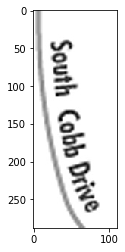

In [3]:
img_name = '43_bbox.jpg'
imgpath = os.path.join(img_dir, img_name)
img = cv2.imread(imgpath)
plt.imshow(img)

## method 1 skew correction -cv2 angle + cv2 correction

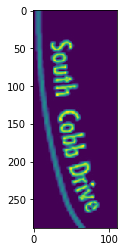

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
plt.imshow(gray)

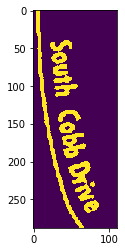

In [5]:
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(thresh)

In [6]:
coords = np.column_stack(np.where(thresh > 0))
angle = cv2.minAreaRect(coords)[-1]
angle

-80.58171844482422

In [7]:
# the `cv2.minAreaRect` function returns values in the
# range [-90, 0); as the rectangle rotates clockwise the
# returned angle trends to 0 -- in this special case we
# need to add 90 degrees to the angle
if angle < -45:
    angle = -(90 + angle)
 
# otherwise, just take the inverse of the angle to make
# it positive
else:
    angle = -angle
    
print(angle)

-9.418281555175781


In [8]:
# angle = angle - 90

In [9]:
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

-9.418281555175781


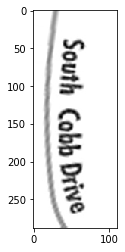

In [10]:
print(angle)
plt.imshow(rotated)

## Method 2 skew correction- self angle + self correction

In [11]:
def print_text_from_image(img, psm=6):
    config = ('--tessdata-dir /home/dsserver/.tessdata/tessdata -l eng --oem 1 --psm {}'.format(psm))
    text = pytesseract.image_to_string(img, config=config)
    print(text)

In [21]:
def pil_to_cv2(pil_img):
    return np.array(pil_img)

In [19]:
def rotate_skew_image(img):
    h, w = img.shape
    rot_degree = math.degrees(math.atan(h/w))
    print(rot_degree)
    
#     rot_img1 = imutils.rotate_bound(img,rot_degree)
#     rot_img2 = imutils.rotate_bound(img,(-rot_degree))
    pil_img = Image.fromarray(img)
    rot_img1 = pil_img.rotate((360 - rot_degree),expand=1, fillcolor=(255))
    rot_img2 = pil_img.rotate((rot_degree),expand=1, fillcolor=(255))
    rot_img1 = pil_to_cv2(rot_img1)
    rot_img2 = pil_to_cv2(rot_img2)
    return rot_img1, rot_img2

In [22]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rot_img1, rot_img2 = rotate_skew_image(img_gray)

68.92250588301327


05
&
oo


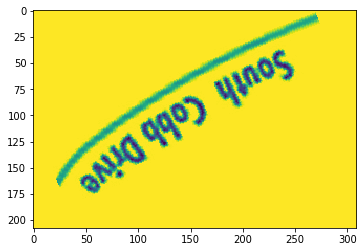

In [23]:
plt.imshow(rot_img1)
print_text_from_image(rot_img1, 6)

2 Cl re,


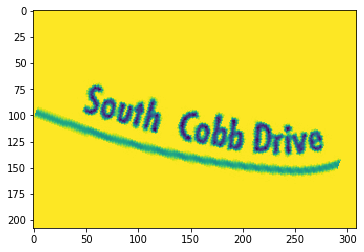

In [24]:
plt.imshow(rot_img2)
print_text_from_image(rot_img2, 6)

In [25]:
print_text_from_image(rotated, 6)

g
g
3


## Method 3 skew correction- self angle + cv2 correction

In [ ]:
def rotate_skew_image2(img):
    h, w, _ = img.shape
    rot_degree = math.degrees(math.atan(h/w))
    print(rot_degree)
    center = (w // 2, h // 2)
    
    M1 = cv2.getRotationMatrix2D(center, rot_degree, 1.0)
    rot_img1 = cv2.warpAffine(img, M1, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
    M2 = cv2.getRotationMatrix2D(center, (-rot_degree), 1.0)
    rot_img2 = cv2.warpAffine(img, M2, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
    return rot_img1, rot_img2

In [ ]:
rot_img1, rot_img2 = rotate_skew_image2(img)

In [ ]:
plt.imshow(rot_img1)
print_text_from_image(rot_img1, 6)

In [ ]:
plt.imshow(rot_img2)
print_text_from_image(rot_img2, 6)